In [50]:
import pandas as pd
PATH = ('C:\\Workspace\\CaloryPJ\\datas\\open\\train.csv')
data = pd.read_csv(PATH)


In [51]:
#outliers check
import plotly.express as px 
fit = px.scatter(data, x='Exercise_Duration', y='Calories_Burned')
fit.show()

In [52]:
#Delete outliers (상위에 있는 2개 이상치로 추정)
rows_to_delete = data[data['Calories_Burned'].isin([295,300])]
rows_to_delete
data = data.drop(rows_to_delete.index)
data


,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,F,75,151.0
7496,TRAIN_7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,F,21,114.0
7497,TRAIN_7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,M,57,41.0
7498,TRAIN_7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,M,35,57.0


In [53]:
#Delete duplicates,missing, unnecessary values
data.drop_duplicates(inplace=True) # Duplicates removed 
data.dropna(axis=0, inplace=True) # Missing Values removed
data.drop('ID',axis=1, inplace=True) # ID remove

#Label Encoding
data['Gender'] = data['Gender'].map({'M':0,'F':1}) 
data['Weight_Status'] = data['Weight_Status'].map({'Normal Weight':0, 'Overweight':1, 'Obese':2})


In [59]:

# 특성(X) 및 레이블(y) define
X = data.drop('Calories_Burned', axis=1)
y = data['Calories_Burned']

#Scaling
from sklearn.preprocessing import MinMaxScaler 
mscaler = MinMaxScaler() #MinMaxScaler Class Name assigned
X= mscaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train) #'model'이 학습 모델임

pred = model.predict(X_test) #위 트레인한 값으로 X_test 

from sklearn.metrics import r2_score #결정계수
r2_score(y_test, pred)

import matplotlib.pyplot as plt
plt.plot(y_test.to_numpy()[:100], label='test') #Actual
plt.plot(pred[:100],label='pred') #Prediction
plt.legend()

0.9689955668439025

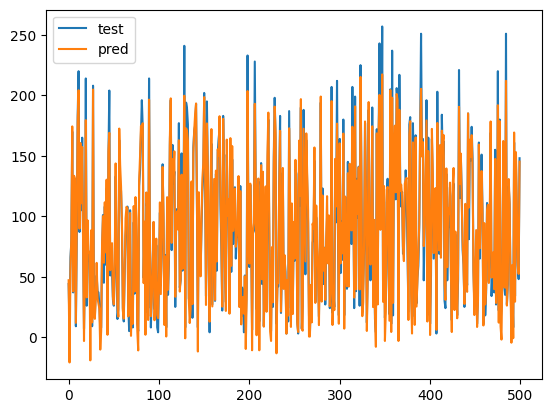

In [55]:
#visualization
import matplotlib.pyplot as plt
plt.plot(y_test.to_numpy()[:500], label='test') #Actual
plt.plot(pred[:500],label='pred') #Prediction
plt.legend()

In [60]:
#TEST
PATH1 = 'C:\\Workspace\\CaloryPJ\\datas\\open\\test.csv'
test_data = pd.read_csv(PATH1)
test_data.drop_duplicates(inplace=True) # Duplicates removed 
test_data.dropna(axis=0, inplace=True) # Missing Values removed
test_data.drop('ID',axis=1, inplace=True) # ID remove

#Label Encoding
test_data['Gender'] = test_data['Gender'].map({'M':0,'F':1}) 
test_data['Weight_Status'] = test_data['Weight_Status'].map({'Normal Weight':0, 'Overweight':1, 'Obese':2})

# 특성(X) 및 레이블(y) define
X1 = test_data
#Scaling
X1= mscaler.fit_transform(X1)

pred_test = model.predict(X1)


In [61]:
pred_test

array([179.51993532, 202.88058067,  62.86159907, ..., 145.12964479,
        30.75207702, 194.98580298])

In [62]:
submission = pd.read_csv('C:\\Workspace\\CaloryPJ\\datas\\open\\sample_submission.csv')
submission['Calories_Burned'] = pred_test

In [63]:
submission.to_csv('first_compe.csv')

In [67]:
from sklearn.metrics import mean_squared_error
rsme = mean_squared_error(y_test, pred, squared=False)
print('RSME score:', rsme)

RSME score: 11.027342782971692


In [ ]:
## 이상치 관련 self 참고용
# z_scores = (data - data.mean()) / data.std()
# thereshold = 3
# outlier_rows = (z_scores.abs() > thereshold).any(axis=1)
# data_no_outliers = data[~outlier_rows]
# data_no_outliers.head()
# data_no_outliers.describe()

#showing graph each of columns seperately
# for column in data.columns:
#    plt.figure()
#    plt.boxplot(data[column])
#    plt.title(column)


#Remove outliers in Body_Temperature
# Q1 = data['Body_Temperature(F)'].quantile(0.27)
# Q3 = data['Body_Temperature(F)'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 -1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# data_no_outliers = data[(data['Body_Temperature(F)'] >= lower_bound) & (data['Body_Temperature(F)'] <= upper_bound)]
# data = data_no_outliers

#Show the figures
# plt.boxplot([data['Body_Temperature(F)'], data_no_outliers['Body_Temperature(F)']])
# plt.xticks([1,2], ['Original', 'No Outliers'])
# plt.ylabel('Body Temperature')
# plt.show()

In [ ]:
## 최대,최소값 self 확인용
max_temp = data['Body_Temperature(F)'].max()
min_temp = data['Body_Temperature(F)'].min()

print(f"Maximum: {max_temp}")
print(f"Minimum:{min_temp}")